In [125]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy as sp

import statsmodels.api as sm

Automatically created module for IPython interactive environment


# Linear Regression

Code for Ridge regression taken from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html, author Author: Kornel Kielczewski -- <kornel.k@plusnet.pl>.

Lasso coefficients as a function of the L1 regularization adpated from Plot Ridge coefficients as a function of the L2 regularizatiion, (clf = Ridge changed to clf = Lasso).

First, we will create the data for a linear model using the sklearn built in function.  We will add a constant column to $X_0$ to force an intercept.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

## Classical approach

In [2]:
X_0, y, w = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=1,noise=10, coef=True,
                          random_state=1, bias=5.)

In [72]:
w

array([ 0.        , 26.7460667 ,  3.2853464 ,  0.        ,  0.        ,
       86.50810999,  0.        ,  0.        , 93.32225451, 12.44482786])

In [12]:
X_0[0:3,:]

array([[ 0.6998327 , -1.75111321,  0.68065369, -1.44312074,  1.5763563 ,
        -0.44263734, -0.12563068,  0.21283107, -1.03617381,  0.53414308],
       [-0.78686826,  0.15132117,  1.08923133,  1.07766277,  1.15654825,
         1.09492656,  1.86897482, -0.00223836, -0.80060285,  0.8918484 ],
       [-0.40701313, -0.21250762,  0.31652996, -0.93011539, -0.86061474,
        -0.05833927, -0.48540028, -0.33385612, -0.68371333, -1.16814212]])

In [14]:

X = sm.add_constant(X_0)
X[0:3,:]

array([[ 1.        ,  0.6998327 , -1.75111321,  0.68065369, -1.44312074,
         1.5763563 , -0.44263734, -0.12563068,  0.21283107, -1.03617381,
         0.53414308],
       [ 1.        , -0.78686826,  0.15132117,  1.08923133,  1.07766277,
         1.15654825,  1.09492656,  1.86897482, -0.00223836, -0.80060285,
         0.8918484 ],
       [ 1.        , -0.40701313, -0.21250762,  0.31652996, -0.93011539,
        -0.86061474, -0.05833927, -0.48540028, -0.33385612, -0.68371333,
        -1.16814212]])

In [15]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=.3, train_size=None, random_state=1, 
                                                  shuffle=True, stratify=None)

In [24]:
ols_m = sm.OLS(y_train,X_train).fit()
print(ols_m.summary())

y_pred = ols_m.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
y_avg = y.mean()
print("y average:", y_avg)
print("MSE:",mse)
print("SQRT MSE:", np.sqrt(mse))
print("MAE:",mae)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:08:53   Log-Likelihood:                -2602.7
No. Observations:                 700   AIC:                             5227.
Df Residuals:                     689   BIC:                             5278.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0247      0.383     13.128      0.0

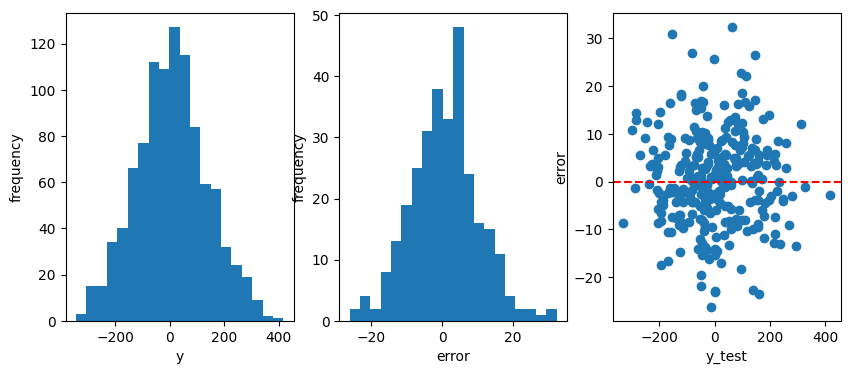

In [82]:
error = y_test-y_pred
fig, axes = plt.subplots(1, 3,figsize=(10,4))

plt.subplot(1,3,1)
plt.hist(y,bins=20)
plt.xlabel("y")
plt.ylabel("frequency")

plt.subplot(1,3,2)
plt.hist(error,bins=20)
plt.xlabel("error")
plt.ylabel("frequency")

plt.subplot(1,3,3)
plt.scatter(y_test,error)
plt.xlabel("y_test")
plt.ylabel("error")
plt.axhline(y = 0.0, color = 'r', linestyle = 'dashed') 

plt.show()


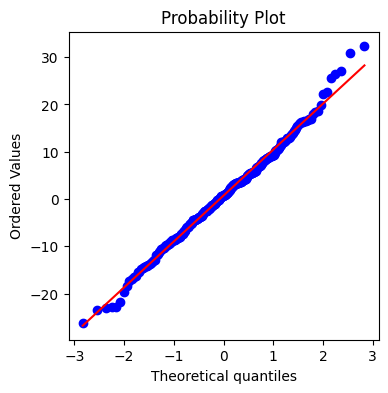

In [71]:
fig, ax = plt.subplots(figsize=(4,4),dpi=100)
_=sp.stats.probplot(error,plot=ax)

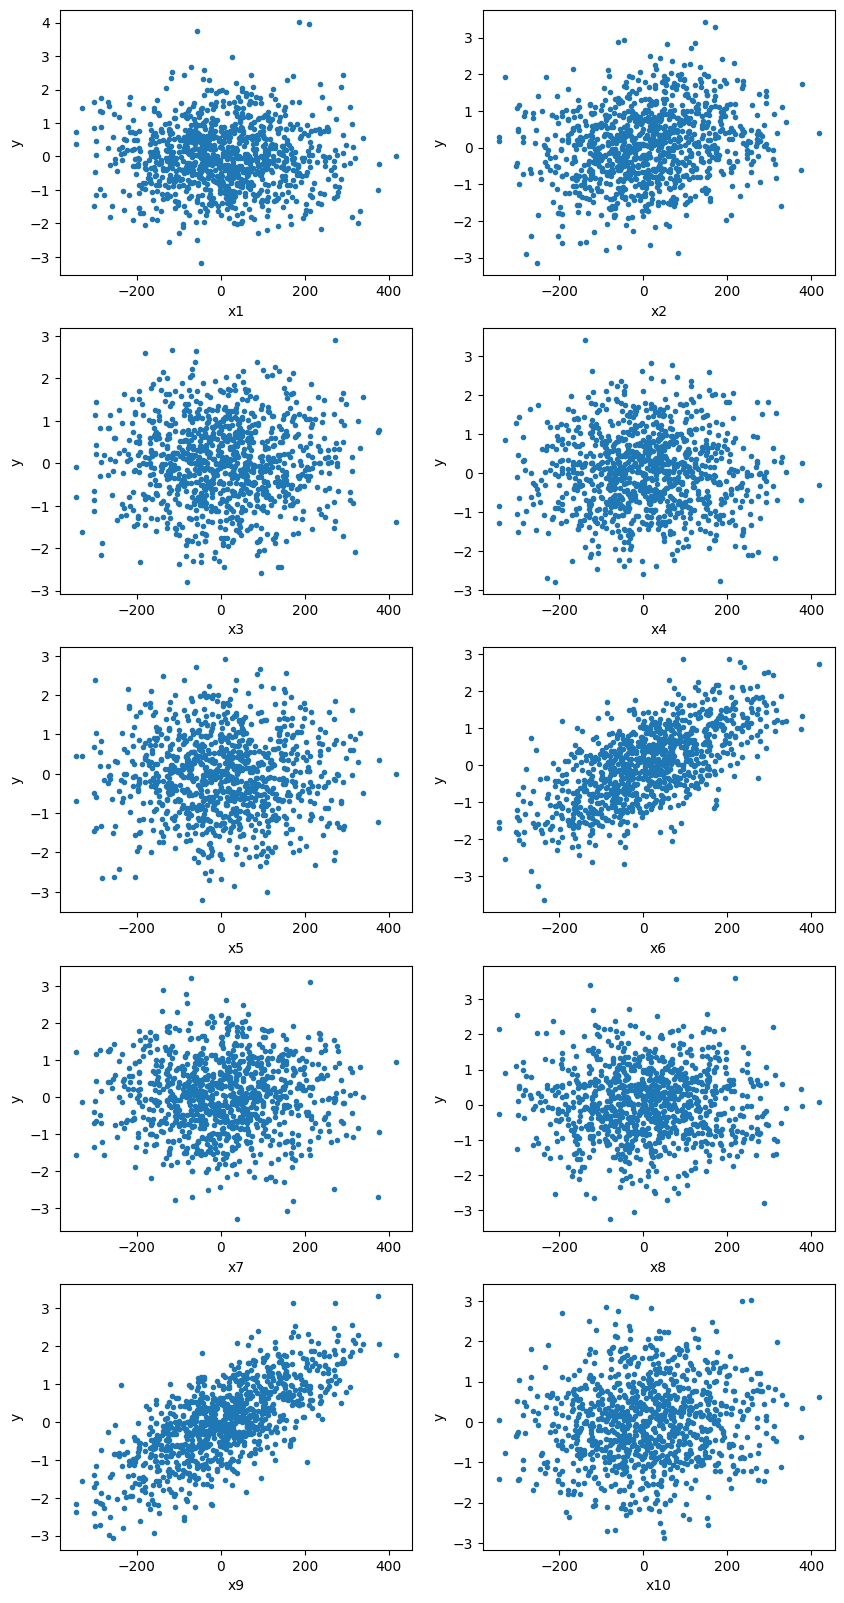

In [110]:
fig, axes = plt.subplots(5,2,figsize=(10,20))

plt.subplot(5,2,1)
plt.scatter(y, X[:,1],marker= '.')
plt.xlabel("x1")
plt.ylabel("y")

plt.subplot(5,2,2)
plt.scatter(y, X[:,2],marker= '.')
plt.xlabel("x2")
plt.ylabel("y")

plt.subplot(5,2,3)
plt.scatter(y, X[:,3],marker= '.')
plt.xlabel("x3")
plt.ylabel("y")

plt.subplot(5,2,4)
plt.scatter(y, X[:,4],marker= '.')
plt.xlabel("x4")
plt.ylabel("y")

plt.subplot(5,2,5)
plt.scatter(y, X[:,5],marker= '.')
plt.xlabel("x5")
plt.ylabel("y")

plt.subplot(5,2,6)
plt.scatter(y, X[:,6],marker= '.')
plt.xlabel("x6")
plt.ylabel("y")

plt.subplot(5,2,7)
plt.scatter(y, X[:,7],marker= '.')
plt.xlabel("x7")
plt.ylabel("y")

plt.subplot(5,2,8)
plt.scatter(y, X[:,8],marker= '.')
plt.xlabel("x8")
plt.ylabel("y")

plt.subplot(5,2,9)
plt.scatter(y, X[:,9],marker= '.')
plt.xlabel("x9")
plt.ylabel("y")

plt.subplot(5,2,10)
plt.scatter(y, X[:,10],marker= '.')
plt.xlabel("x10")
plt.ylabel("y")

plt.show()


### In summary 

The model is significant, omnibus F test p<0.05.

There are six statistical significant input, $x_2$, $x_3$, $x_5$, $x_6$, $x_9$, $x_{10}$.

Errors are normally distributed.

Errors are independent of $\hat y$.

The model can explain Adj. R-squared: 0.994 percentage of the y variance (this is definitely not very common with real data).

## Ridge L2 Regularization

.. currentmodule:: sklearn.linear_model

:class:`Ridge` Regression is the estimator used in this example.
Each color in the left plot represents one different dimension of the
coefficient vector, and this is displayed as a function of the
regularization parameter. The right plot shows how exact the solution
is. This example illustrates how a well defined solution is
found by Ridge regression and how regularization affects the
coefficients and their values. The plot on the right shows how
the difference of the coefficients from the estimator changes
as a function of regularization.

In this example the dependent variable Y is set as a function
of the input features: y = X*w + c. The coefficient vector w is
randomly sampled from a normal distribution, whereas the bias term c is
set to a constant.

As alpha tends toward zero the coefficients found by Ridge
regression stabilize towards the randomly sampled vector w.
For big alpha (strong regularisation) the coefficients
are smaller (eventually converging at 0) leading to a
simpler and biased solution.
These dependencies can be observed on the left plot.

The right plot shows the mean squared error between the
coefficients found by the model and the chosen vector w.
Less regularised models retrieve the exact
coefficients (error is equal to 0), stronger regularised
models increase the error.

Please note that in this example the data is non-noisy, hence
it is possible to extract the exact coefficients.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html

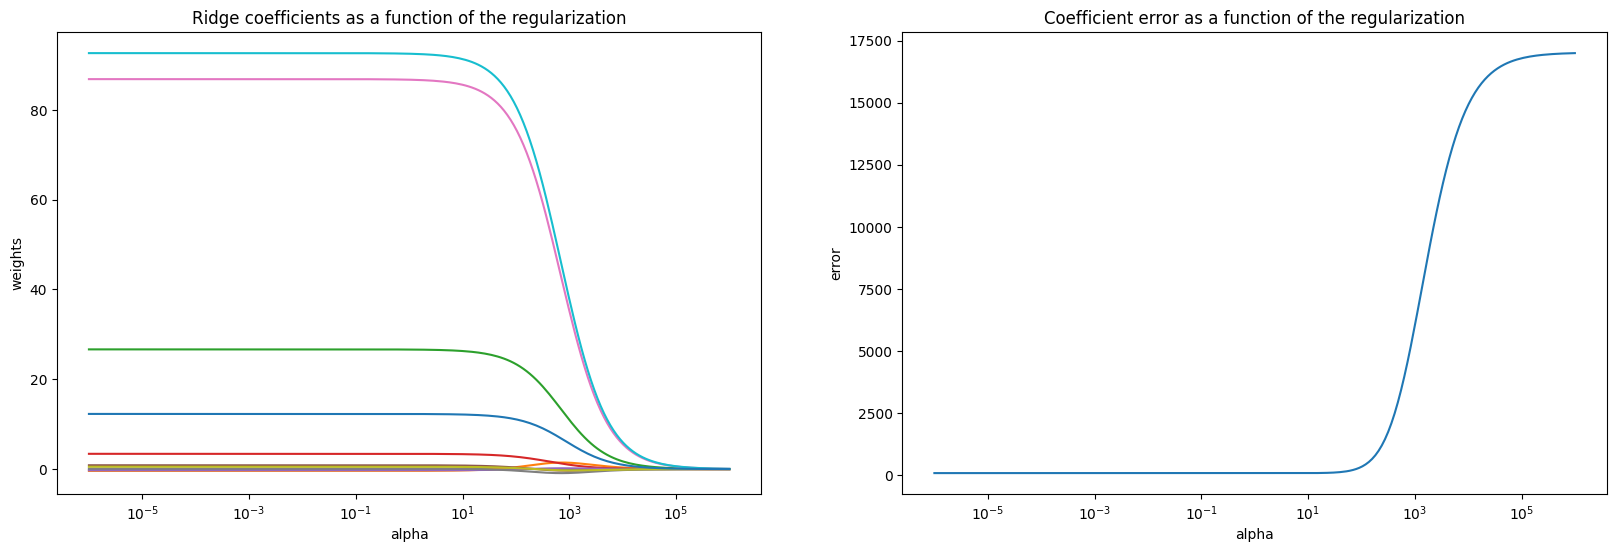

In [112]:
clf = Ridge()

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_pred,y_test))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

To see how the coefficients are impacted by the regularization, we will generate less points.

In [122]:
coefs = []
errors = []

alphas = np.logspace(-6, 6, 7)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_pred,y_test))

In [123]:
print("alphas:")
print(alphas)
print("Coefficients:")
print(coefs)

alphas:
[1.e-06 1.e-04 1.e-02 1.e+00 1.e+02 1.e+04 1.e+06]
Coefficients:
[array([ 0.        , -0.4018873 , 26.66360916,  3.40578687, -0.25998402,
        0.85948698, 86.84985529,  0.10701242,  0.5292038 , 92.64069237,
       12.28939918]), array([ 0.        , -0.4018862 , 26.66360549,  3.4057861 , -0.25998374,
        0.8594863 , 86.84984268,  0.10701183,  0.52920341, 92.64067901,
       12.28939788]), array([ 0.        , -0.401777  , 26.66323824,  3.40570916, -0.25995589,
        0.85941903, 86.84858143,  0.10695292,  0.52916508, 92.63934313,
       12.28926842]), array([ 0.        , -0.39088968, 26.62656147,  3.39803158, -0.25718027,
        0.85271337, 86.72264182,  0.10108002,  0.52534225, 92.50595161,
       12.27633218]), array([ 0.00000000e+00,  4.27923212e-01,  2.33873275e+01,  2.76405051e+00,
       -5.48296848e-02,  3.51421908e-01,  7.57471750e+01, -3.41166961e-01,
        2.27138104e-01,  8.08768341e+01,  1.10855476e+01]), array([ 0.        ,  0.3552547 ,  1.72335405,  0.118

There is no information on which coefficient is important.  Low regularization is equivalent to OLS.  With big regularization all coefficients eventually go to zero.

## Lasso L1 Regularization

adpated from Plot Ridge coefficients as a function of the L2 regularizatiion


https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html

(clf = Ridge changed to clf = Lasso)

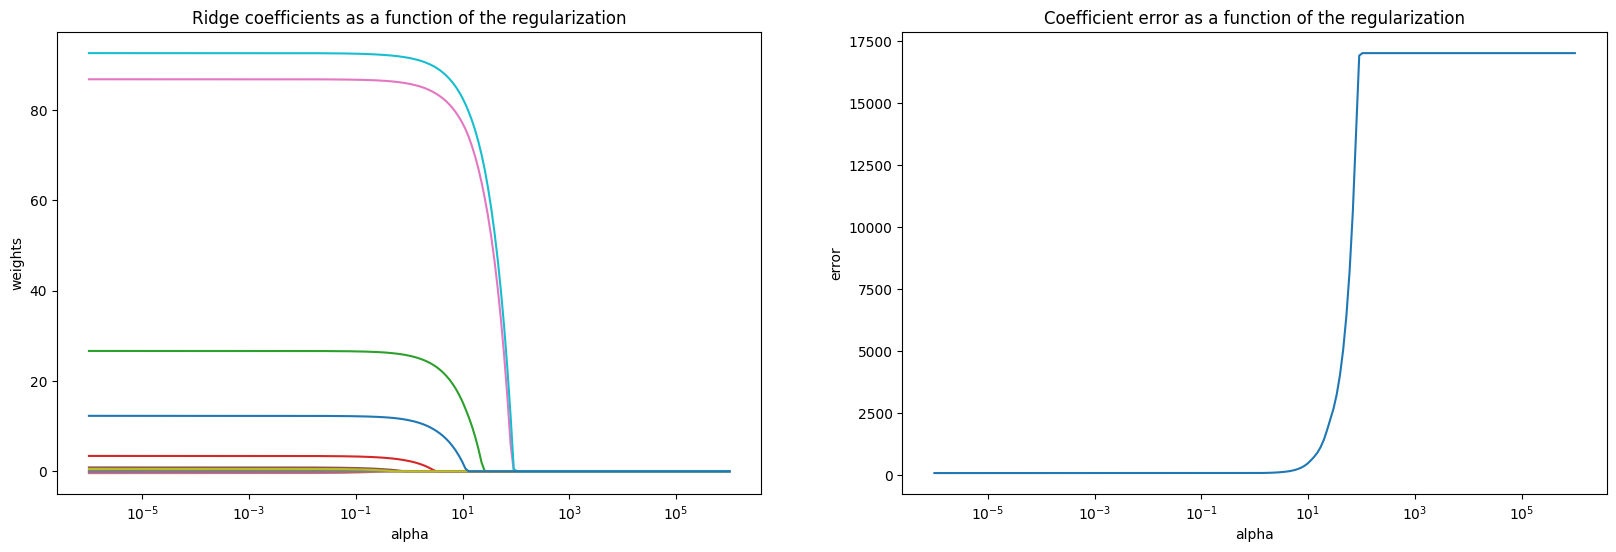

In [126]:
clf = Lasso()

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_pred,y_test))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

To see how the coefficients are impacted by the regularization, we will generate less points.

In [127]:
coefs = []
errors = []

alphas = np.logspace(-6, 6, 7)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_pred,y_test))

In [128]:
print("alphas:")
print(alphas)
print("Coefficients:")
print(coefs)

alphas:
[1.e-06 1.e-04 1.e-02 1.e+00 1.e+02 1.e+04 1.e+06]
Coefficients:
[array([ 0.        , -0.40188592, 26.66360832,  3.40578563, -0.25998274,
        0.85948565, 86.84985441,  0.10701126,  0.52920277, 92.64069124,
       12.28939831]), array([ 0.        , -0.40175866, 26.66351683,  3.40566521, -0.25985753,
        0.8593556 , 86.84975534,  0.10689639,  0.52910218, 92.64056691,
       12.28930979]), array([ 0.        , -0.38878258, 26.65447665,  3.39354583, -0.24728173,
        0.8462924 , 86.83981627,  0.09540737,  0.51901799, 92.62811415,
       12.28047825]), array([ 0.        , -0.        , 25.61235955,  2.26808083, -0.        ,
        0.        , 85.84507175,  0.        ,  0.        , 91.56893286,
       11.30469938]), array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.])]
